In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns
sns.set()

import sklearn
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

## Pretty variable display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## RANDOM STATE
seed=3

In [8]:
df5 = pd.read_csv('../datasets/lineups/5man_lineups_150min_1997_2020.csv', index_col=0)
df4 = pd.read_csv('../datasets/lineups/4man_lineups_300min_1997_2020.csv', index_col=0)

# df.head()
df5.shape
df4.shape

(1964, 27)

(5977, 27)

In [34]:
df5.head()

,mp,diff_pts,diff_fg,diff_fga,diff_fg_pct,diff_fg3,diff_fg3a,diff_fg3_pct,diff_efg_pct,diff_ft,...,diff_blk,diff_tov,diff_pf,player_ids,number_players,year,team,...,...,...
lineup,,,,,,,,,,,,,,,,,,,,,
M. Blaylock | T. Corbin | C. Laettner | D. Mutombo | S. Smith ATL 1997,1189.850000,15.8,3.7,-2.6,0.054,1.5,3.7,0.011,0.064,6.9,...,2.3,-1.9,-1.1,"blaylmo01, corbity01, laettch01, mutomdi01, sm...",5,1997,ATL,...,...,...
M. Blaylock | H. James | C. Laettner | D. Mutombo | S. Smith ATL 1997,357.366667,9.7,0.3,-6.8,0.037,1.9,8.3,-0.064,0.051,7.2,...,3.7,-1.0,-1.4,"blaylmo01, jameshe01, laettch01, mutomdi01, sm...",5,1997,ATL,...,...,...
M. Blaylock | T. Corbin | C. Laettner | D. Mutombo | S. Smith ATL 1998,726.983333,13.9,2.6,-5.2,0.055,-0.1,-2.1,0.037,0.056,8.6,...,4.4,-0.2,-1.5,"blaylmo01, corbity01, laettch01, mutomdi01, sm...",5,1998,ATL,...,...,...
M. Blaylock | T. Corbin | A. Henderson | D. Mutombo | S. Smith ATL 1998,560.283333,17.0,2.7,-2.3,0.040,-0.2,1.2,-0.035,0.040,10.8,...,2.2,-1.9,-3.6,"blaylmo01, corbity01, hendeal01, mutomdi01, sm...",5,1998,ATL,...,...,...
T. Corbin | C. Laettner | D. Mutombo | E. Recasner | S. Smith ATL 1998,201.666667,2.2,-0.2,-6.1,0.026,0.0,0.9,-0.019,0.028,1.5,...,0.8,4.5,2.3,"corbity01, laettch01, mutomdi01, recasel01, sm...",5,1998,ATL,...,...,...


In [10]:
sorted(df5.columns)

['diff_ast',
 'diff_blk',
 'diff_drb',
 'diff_drb_pct',
 'diff_efg_pct',
 'diff_fg',
 'diff_fg3',
 'diff_fg3_pct',
 'diff_fg3a',
 'diff_fg_pct',
 'diff_fga',
 'diff_ft',
 'diff_ft_pct',
 'diff_fta',
 'diff_orb',
 'diff_orb_pct',
 'diff_pf',
 'diff_pts',
 'diff_stl',
 'diff_tov',
 'diff_trb',
 'diff_trb_pct',
 'mp',
 'number_players',
 'player_ids',
 'team',
 'year']

In [28]:
df5["    ..."] = ["    ..."] * len(df5)

In [30]:
cols = ['diff_pts',
        'diff_trb',
        'diff_ast',
        'diff_fta',
        '    ...',
#         'diff_fg3_pct',
#         'diff_tov',
#         'diff_stl',
#         'diff_blk',
#         'diff_efg_pct',
        'mp',
        'team',
        'year',
        'player_ids'
       ]

df5[cols]

,diff_pts,diff_trb,diff_ast,diff_fta,...,mp,team,year,player_ids
lineup,,,,,,,,,
M. Blaylock | T. Corbin | C. Laettner | D. Mutombo | S. Smith ATL 1997,15.8,1.8,1.6,8.0,...,1189.850000,ATL,1997,"blaylmo01, corbity01, laettch01, mutomdi01, sm..."
M. Blaylock | H. James | C. Laettner | D. Mutombo | S. Smith ATL 1997,9.7,-2.2,-3.6,5.7,...,357.366667,ATL,1997,"blaylmo01, jameshe01, laettch01, mutomdi01, sm..."
M. Blaylock | T. Corbin | C. Laettner | D. Mutombo | S. Smith ATL 1998,13.9,2.8,2.2,10.1,...,726.983333,ATL,1998,"blaylmo01, corbity01, laettch01, mutomdi01, sm..."
M. Blaylock | T. Corbin | A. Henderson | D. Mutombo | S. Smith ATL 1998,17.0,3.5,-1.7,14.8,...,560.283333,ATL,1998,"blaylmo01, corbity01, hendeal01, mutomdi01, sm..."
T. Corbin | C. Laettner | D. Mutombo | E. Recasner | S. Smith ATL 1998,2.2,-0.7,-2.6,-0.9,...,201.666667,ATL,1998,"corbity01, laettch01, mutomdi01, recasel01, sm..."
...,...,...,...,...,...,...,...,...,...
T. Frazier | I. Mahinmi | J. Meeks | K. Oubre | M. Scott WAS 2018,-4.6,2.1,3.0,0.3,...,164.616667,WAS,2018,"fraziti01, mahinia01, meeksjo01, oubreke01, sc..."
I. Mahinmi | J. Meeks | K. Oubre | T. Satoranský | M. Scott WAS 2018,-7.4,0.2,-0.1,-0.1,...,158.233333,WAS,2018,"mahinia01, meeksjo01, oubreke01, satorto01, sc..."
T. Ariza | B. Beal | T. Bryant | J. Green | T. Satoranský WAS 2019,-0.8,-1.0,1.1,2.3,...,357.433333,WAS,2019,"arizatr01, bealbr01, bryanth01, greenje02, sat..."


In [37]:
df5 = pd.read_csv('../datasets/master_5man_lineup_clusters_2000_2020.csv', index_col=0)
df4 = pd.read_csv('../datasets/master_4man_lineup_clusters_2000_2020.csv', index_col=0)

# df.head()
df5.shape
df4.shape

(1682, 51)

(5222, 51)

In [38]:
df5.head()

,mp,diff_pts,diff_fg,diff_fga,diff_fg_pct,diff_fg3,diff_fg3a,diff_fg3_pct,diff_efg_pct,diff_ft,...,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11
lineup,,,,,,,,,,,,,,,,,,,,,
B. Coles | A. Henderson | J. Jackson | D. Mutombo | I. Rider ATL 2000,869.000000,-1.2,-0.8,-3.5,0.008,-1.7,-4.0,-0.002,0.000,2.0,...,0.914418,0.000282,0.000000,0.000359,1.999455,1.0,0.000005,0.000000,0.999653,0.000000
A. Henderson | J. Jackson | R. McLeod | D. Mutombo | J. Terry ATL 2000,294.000000,-16.1,-7.2,-3.8,-0.058,-2.1,-3.0,-0.090,-0.069,0.3,...,0.914418,0.000282,0.000000,0.960006,1.036375,1.0,0.000005,0.000000,0.999010,0.000016
L. Ellis | A. Henderson | J. Jackson | D. Mutombo | J. Terry ATL 2000,217.866667,-4.0,-3.5,-2.4,-0.026,1.0,1.4,0.045,-0.020,2.1,...,0.914418,0.000282,0.000000,0.960006,1.036375,1.0,0.006180,0.000000,0.996896,0.000016
M. Maloney | R. McLeod | D. Mutombo | J. Terry | L. Wright ATL 2001,238.566667,9.4,4.5,3.6,0.031,-1.2,-5.6,0.053,0.024,1.7,...,0.000002,0.000000,0.000000,0.997453,1.000015,1.0,0.000000,0.000000,1.000001,0.002531
S. Abdur-Rahim | D. Johnson | N. Mohammed | I. Newble | J. Terry ATL 2002,450.983333,1.4,-1.2,-0.9,-0.009,0.6,0.1,0.041,-0.006,3.2,...,0.993295,0.957872,0.000002,0.000000,0.000074,1.0,0.996992,0.048741,0.007007,0.000017


In [39]:
df = pd.read_csv('../datasets/master_5man_lineup_clusters_2000_2020.csv', index_col=0)
df.shape
df.head()

(1682, 51)

,mp,diff_pts,diff_fg,diff_fga,diff_fg_pct,diff_fg3,diff_fg3a,diff_fg3_pct,diff_efg_pct,diff_ft,...,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11
lineup,,,,,,,,,,,,,,,,,,,,,
B. Coles | A. Henderson | J. Jackson | D. Mutombo | I. Rider ATL 2000,869.000000,-1.2,-0.8,-3.5,0.008,-1.7,-4.0,-0.002,0.000,2.0,...,0.914418,0.000282,0.000000,0.000359,1.999455,1.0,0.000005,0.000000,0.999653,0.000000
A. Henderson | J. Jackson | R. McLeod | D. Mutombo | J. Terry ATL 2000,294.000000,-16.1,-7.2,-3.8,-0.058,-2.1,-3.0,-0.090,-0.069,0.3,...,0.914418,0.000282,0.000000,0.960006,1.036375,1.0,0.000005,0.000000,0.999010,0.000016
L. Ellis | A. Henderson | J. Jackson | D. Mutombo | J. Terry ATL 2000,217.866667,-4.0,-3.5,-2.4,-0.026,1.0,1.4,0.045,-0.020,2.1,...,0.914418,0.000282,0.000000,0.960006,1.036375,1.0,0.006180,0.000000,0.996896,0.000016
M. Maloney | R. McLeod | D. Mutombo | J. Terry | L. Wright ATL 2001,238.566667,9.4,4.5,3.6,0.031,-1.2,-5.6,0.053,0.024,1.7,...,0.000002,0.000000,0.000000,0.997453,1.000015,1.0,0.000000,0.000000,1.000001,0.002531
S. Abdur-Rahim | D. Johnson | N. Mohammed | I. Newble | J. Terry ATL 2002,450.983333,1.4,-1.2,-0.9,-0.009,0.6,0.1,0.041,-0.006,3.2,...,0.993295,0.957872,0.000002,0.000000,0.000074,1.0,0.996992,0.048741,0.007007,0.000017


# Recreate lineup zscore plot

In [44]:
def get_lineup_salary(lineup, df_players):
    player_ids = lineup['player_ids'].split(', ')
    year = lineup['year']
    total_salary = 0
    for pid in player_ids:
        player = df_players[(df_players['year']==year) & (df_players['player_id']==pid)]
        total_salary += player['salary'].item()
    return total_salary

def check_if_valid_lineup(lineup, df_players):
    player_ids = lineup['player_ids'].split(', ')
    year = lineup['year']    
    for pid in player_ids:
        if df_players[(df_players['player_id']==pid) & (df_players['year']==year)].empty:
            return False
    return True

In [46]:
## get restricted player df
df_players = pd.read_csv('../datasets/master_players_stats_bio_clusters_pca.csv', index_col=0)
df_players_salary = df_players[df_players['year']<2020].copy()
df_players_salary.dropna(axis=0, inplace=True)  ## only missing data is salary info

In [48]:
df = pd.read_csv('../datasets/master_5man_lineup_clusters_2000_2020.csv', index_col=0)
df.shape
valid_indices = df.apply(lambda lineup: check_if_valid_lineup(lineup, df_players_salary), axis=1)
df5 = df[valid_indices].copy()
df5.shape

(1682, 51)

(1619, 51)

In [49]:
df5['total_salary'] = df5.apply(lambda lineup: get_lineup_salary(lineup, df_players), axis=1)

In [55]:
yearly_salary_mu_sigma = df5.groupby('year')['total_salary'].agg(['mean', 'std'])
yearly_salary_mu_sigma

,mean,std
year,,
2000,2.576175e+07,9.774535e+06
2001,2.845078e+07,9.688395e+06
2002,2.820306e+07,9.718713e+06
2003,2.939772e+07,9.565163e+06
2004,2.922769e+07,1.059221e+07
2005,3.173350e+07,9.778641e+06
2006,3.333093e+07,8.433753e+06
2007,3.542508e+07,8.946053e+06
2008,3.689363e+07,1.161077e+07


In [58]:
def get_lineup_salary_zscore(lineup, yearly_salary_mu_sigma):
    year = lineup['year']    
    mu, sigma = yearly_salary_mu_sigma.loc[year].values
    return (lineup['total_salary'] - mu) / sigma

In [59]:
df5['salary_zscore'] = df5.apply(lambda lineup: get_lineup_salary_zscore(lineup, yearly_salary_mu_sigma), axis=1)

In [60]:
df5[['salary_zscore', 'total_salary']][0:25]

,salary_zscore,total_salary
lineup,,
B. Coles | A. Henderson | J. Jackson | D. Mutombo | I. Rider ATL 2000,0.205834,27773686.0
A. Henderson | J. Jackson | R. McLeod | D. Mutombo | J. Terry ATL 2000,-0.339084,22447366.0
L. Ellis | A. Henderson | J. Jackson | D. Mutombo | J. Terry ATL 2000,-0.235730,23457606.0
M. Maloney | R. McLeod | D. Mutombo | J. Terry | L. Wright ATL 2001,-0.490597,23697680.0
S. Abdur-Rahim | E. Davis | D. Glover | N. Mohammed | J. Terry ATL 2002,-0.928148,19182650.0
S. Abdur-Rahim | D. Glover | T. Ratliff | G. Robinson | J. Terry ATL 2003,0.622104,35348246.0
S. Abdur-Rahim | I. Newble | T. Ratliff | G. Robinson | J. Terry ATL 2003,0.517885,34351369.0
S. Abdur-Rahim | D. Glover | I. Newble | T. Ratliff | J. Terry ATL 2003,-0.347306,26075681.0
S. Abdur-Rahim | D. Glover | S. Jackson | T. Ratliff | J. Terry ATL 2004,0.449566,33989583.0


In [240]:
def annotate_warriors_lineup(lineup):
    coords = lineup[['salary_zscore', 'diff_pts']]
    text = "Curry, Thompson, Green, \nIguodola, Barnes: 2016"
    xytext = (10, -14)
    plt.annotate(text, 
                 xy=coords,
                 xycoords='data',
                 xytext=xytext,
                 textcoords='offset points',
                 size=12,);

def annotate_lal_lineup(lineup):
    coords = lineup[['salary_zscore', 'diff_pts']]
    text = "Bryant, Gasol, Howard, \nNash, World Peace: 2013"
    xytext = (-120, -80)
    plt.annotate(text, 
                 xy=coords,
                 xycoords='data',
                 xytext=xytext,
                 textcoords='offset points',
                 size=12,);
    arrow_base_x = coords[0] - xytext[0]
    arrow_base_y = coords[1] - xytext[1]
    plt.arrow(coords[0]-0.5, coords[1]-12, .49, 10.8, color="black", length_includes_head=True, head_width=0.085, head_length=1)
#     plt.annotate("", xy=(10,10), xytext=xytext, arrowprops=dict(arrowstyle="->"))
     

In [112]:
lineup = df5.sort_values(by='diff_pts', ascending=False).iloc[0, :]
# lineup
x, y = lineup[['salary_zscore', 'diff_pts']]
x, y
lineup

(0.8301010498956921, 45.6)

mp                                                          171.783
diff_pts                                                       45.6
diff_fg                                                        14.6
diff_fga                                                       -6.6
diff_fg_pct                                                   0.212
diff_fg3                                                       13.6
diff_fg3a                                                      12.9
diff_fg3_pct                                                  0.267
diff_efg_pct                                                  0.299
diff_ft                                                         2.8
diff_fta                                                        2.3
diff_ft_pct                                                    0.03
diff_orb                                                       -5.3
diff_orb_pct                                                   -1.2
diff_drb                                        

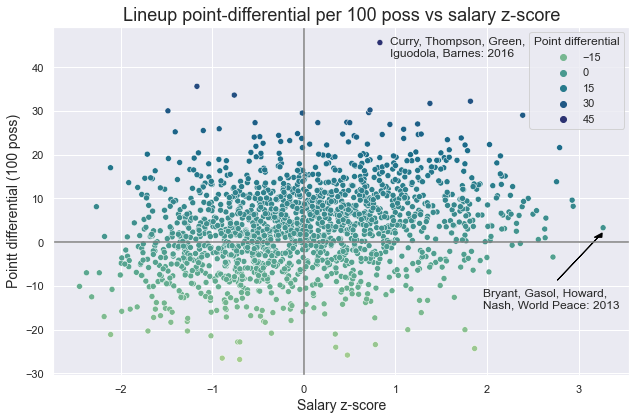

In [242]:
fig, ax = plt.subplots(figsize=(9,6))

sns.scatterplot(x='salary_zscore', y='diff_pts', data=df5, ax=ax, hue='diff_pts', palette='crest')
ax.set_title('Lineup point-differential per 100 poss vs salary z-score', fontsize=18)
ax.set_xlabel('Salary z-score', fontsize=14)
ax.set_ylabel('Pointt differential (100 poss)', fontsize=14)
ax.legend(title='Point differential', loc='upper right')
ax.axvline(0, 0, color='gray')
ax.axhline(0,0, color='gray')

annotate_warriors_lineup(lineup)
annotate_lal_lineup(lal_lineup)

plt.tight_layout()
fig.savefig('../plots/lineup_pts_diff_salary_zscores_annotated.png', bbox_inches='tight');

In [148]:
df5.sort_values(by='salary_zscore', ascending=False)

,mp,diff_pts,diff_fg,diff_fga,diff_fg_pct,diff_fg3,diff_fg3a,diff_fg3_pct,diff_efg_pct,diff_ft,...,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,total_salary,salary_zscore
lineup,,,,,,,,,,,,,,,,,,,,,
M. World Peace | K. Bryant | P. Gasol | D. Howard | S. Nash LAL 2013,189.200000,3.3,-1.3,-11.8,0.048,0.8,-2.1,0.069,0.058,5.2,...,1.0,0.997460,0.000049,0.000000,0.000056,0.502391,0.000009,0.000000,82544469.0,3.268658
S. Pippen | A. Sabonis | S. Smith | D. Stoudamire | R. Wallace POR 2001,281.766667,8.2,4.2,3.2,0.032,-1.9,2.6,-0.189,0.020,1.6,...,0.0,1.000000,1.661410,0.000000,0.000478,0.998847,0.000545,0.000000,56950000.0,2.941584
D. Anderson | D. Davis | S. Pippen | R. Wallace | B. Wells POR 2003,672.550000,9.6,3.2,-2.0,0.048,0.5,1.1,0.009,0.052,2.6,...,0.0,0.000000,1.020020,1.000000,0.000330,1.000112,0.004442,0.000000,57427024.0,2.930353
D. Anderson | D. Davis | R. Patterson | S. Pippen | R. Wallace POR 2003,180.300000,21.6,8.2,0.3,0.090,-3.1,-5.9,-0.050,0.072,8.3,...,0.0,0.000000,0.995717,1.000000,0.999039,1.000112,0.005401,0.000000,56118824.0,2.793586
S. Pippen | A. Sabonis | S. Smith | D. Stoudamire | R. Wallace POR 2000,875.983333,13.8,7.3,-0.2,0.082,-0.2,-1.4,0.023,0.081,-0.6,...,0.0,1.000000,0.000247,0.000000,0.000002,0.003205,0.000000,0.000000,52739123.0,2.759965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P. Brezec | M. Ely | R. Felton | J. Jones | B. Knight CHA 2006,152.450000,-7.0,-0.5,2.3,-0.018,0.6,-4.1,0.153,-0.016,-6.5,...,0.0,0.999968,0.999999,2.000000,0.000154,0.000000,0.000034,0.000000,14473387.0,-2.235961
J. Childress | A. Johnson | Z. Pachulia | J. Smith | M. Williams ATL 2007,175.016667,8.1,1.3,1.4,0.008,-1.2,-5.2,0.044,0.001,6.7,...,0.0,0.000000,0.058369,0.999997,1.011000,0.000531,0.989015,0.036524,15139360.0,-2.267561
P. Brezec | B. Knight | E. Okafor | K. Rush | G. Wallace CHA 2005,169.700000,-12.5,-3.1,6.3,-0.069,-1.5,-3.0,-0.046,-0.078,-4.8,...,0.0,0.989938,0.000062,2.000000,0.001638,0.000000,0.010071,0.990982,9053205.0,-2.319371


In [147]:
lal_lineup = df5.sort_values(by='salary_zscore', ascending=False).iloc[0, :]
lal_lineup

mp                                                            189.2
diff_pts                                                        3.3
diff_fg                                                        -1.3
diff_fga                                                      -11.8
diff_fg_pct                                                   0.048
diff_fg3                                                        0.8
diff_fg3a                                                      -2.1
diff_fg3_pct                                                  0.069
diff_efg_pct                                                  0.058
diff_ft                                                         5.2
diff_fta                                                       10.4
diff_ft_pct                                                  -0.068
diff_orb                                                       -0.1
diff_orb_pct                                                    3.7
diff_drb                                        